In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [25]:
# # 0도부터 180도까지 RCS 데이터가 있는 dat파일을 불러와 181도부터 360도까지 데이터를 확장한 후 csv 파일 형태로 저장
# # 그 후 첫 번째 열에 고각에 해당하는 각도값의 새 열을 추가하는 코드

# # Shahed
# # input_file_path = 'C:/Users/leeyj/Downloads/F4 RCS Table/F4_1_8GHz_86.dat'
# # output_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed/Shahed136_PO_3D_1_8GHz_고각0.csv'

# # File Pathes
# # 파일 이름과 각도를 알맞게 바꿔가며 데이터를 수정
# input_file_path = 'C:/Users/leeyj/Downloads/F4 RCS Table/F4_1_8GHz_95.dat'
# output_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_1_8GHz_95.csv'
# file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_1_8GHz_95.csv'
# # Define the specific elevation angle to be added
# elevation_angle = 95.0

# def process_and_save_radar_data(input_file_path, output_file_path):

#     # Read the input .dat file
#     with open(input_file_path, 'r') as file:
#         lines = file.readlines()

#     # Extract the existing angle and RCS data
#     angles = np.array([float(line.split('\t')[0]) for line in lines[2:]])
#     rcs_values = np.array([float(line.split('\t')[1]) for line in lines[2:]])

#     # Generate new angles from 181 to 360 degrees
#     new_angles = np.arange(181, 361)

#     # Assuming symmetry for the new angles' RCS values
#     new_rcs_values = np.flip(rcs_values[:180])  # Using the first 180 data points and flipping them

#     # Combine old and new data
#     combined_angles = np.concatenate((angles, new_angles))
#     combined_rcs_values = np.concatenate((rcs_values, new_rcs_values))

#     # Prepare data for saving to CSV
#     combined_data = np.vstack((combined_angles, combined_rcs_values)).T

#     # Save the data to a CSV file
#     np.savetxt(output_file_path, combined_data, delimiter=',', header='Azimuth Angle (degrees),RCS (dBsm)', comments='', fmt='%.10f')

# # Process the data and save to a new CSV file
# process_and_save_radar_data(input_file_path, output_file_path)

# # Load the CSV file
# data = pd.read_csv(file_path)

# # Insert the new column for elevation angle
# data.insert(0, 'Elevation Angle (degrees)', elevation_angle)

# # Save the modified dataframe to a new CSV file
# data.to_csv(file_path, index=False,float_format='%.10f')

In [4]:
# 위 내용을 반복문을 통해 자동화
# folder_path는 수정 전 .dat 파일들이 있는 폴더 경로
# 데이터를 수정할 기체의 폴더에 맞게 이름을 수정 후 사용
folder_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table'
# input_file_path와 file_path는 데이터 전처리 전 개별 dat 파일
# output_file_path 및 output_csv_path는 데이터 전처리가 끝난 후 생성된 csv 파일

def process_and_save_radar_data(input_file_path, output_file_path):
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    angles = np.array([float(line.split('\t')[0]) for line in lines[2:]])
    rcs_values = np.array([float(line.split('\t')[1]) for line in lines[2:]])

    new_angles = np.arange(181, 361)
    new_rcs_values = np.flip(rcs_values[:180])

    combined_angles = np.concatenate((angles, new_angles))
    combined_rcs_values = np.concatenate((rcs_values, new_rcs_values))

    combined_data = np.vstack((combined_angles, combined_rcs_values)).T
    np.savetxt(output_file_path, combined_data, delimiter=',', header='Azimuth Angle (degrees),RCS (dBsm)', comments='', fmt='%.10f')

def main(folder_path):
    # 파일 목록을 이름순으로 정렬
    file_paths = sorted(glob.glob(os.path.join(folder_path, 'Tonahawk_1_8GHz_*.dat')))
    for file_path in file_paths:
        # 파일 이름에서 고각 추출
        elevation_angle = float(os.path.basename(file_path).split('_')[-1].replace('.dat', ''))
        
        # 출력 파일 경로 생성
        output_csv_path = file_path.replace('.dat', '.csv')
        
        # 데이터 처리 및 CSV 저장
        process_and_save_radar_data(file_path, output_csv_path)
        
        # CSV 파일 로드 및 고각 열 추가
        data = pd.read_csv(output_csv_path)
        data.insert(0, 'Elevation Angle (degrees)', elevation_angle)
        data.to_csv(output_csv_path, index=False, float_format='%.10f')

main(folder_path)

Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_0.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_1.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_100.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_101.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_102.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_103.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_104.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_105.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_106.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_107.csv
Processed and saved C:/Users/leeyj/Downloads/Tomahawk RCS Table\Tonahawk_1_8GHz_108.csv
Processed and saved C:/Users/leeyj/D

In [23]:
# 수정된 csv파일들을 하나씩 불러와 데이터를 쌓아 하나의 csv파일에 모든 정보가 있게끔 만드는 코드
folder_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table'
output_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Tomahawk/Tomahawk_PO_3D_PEC_1.csv'

def extract_elevation_angle(file_name):
    # 파일 이름에서 고각 값을 추출
    base_name = os.path.basename(file_name)
    elevation_angle = float(base_name.split('_')[-1].replace('.csv', ''))
    return elevation_angle

def combine_csv_files(folder_path, output_file_path):
    # 파일 목록을 찾아 고각 값 기준으로 정렬
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
    csv_files = sorted(csv_files, key=extract_elevation_angle)
    
    combined_data = pd.DataFrame()
    
    for file_path in csv_files:
        # CSV 파일 로드
        data = pd.read_csv(file_path)
        
        # 데이터 결합
        combined_data = pd.concat([combined_data, data], ignore_index=True)
    
    # 결합된 데이터의 헤더 제거
    combined_data.columns = ['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)']
    
    # 모든 열이 같은 이름으로 설정된 것을 제거
    combined_data = combined_data.reset_index(drop=True)

    # 결합된 데이터를 CSV 파일로 저장
    combined_data.to_csv(output_file_path, index=False, header=False, float_format='%.10f')

combine_csv_files(folder_path, output_file_path)

In [ ]:
# # 수정된 csv파일에 고각에 대한 열을 추가하는 코드
# # 넣고자하는 고각(Elevation Angle) 값을 수정하여 csv 파일을 업데이트

# # Load the CSV file
# file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed136_PO_3D_1_8GHz_고각10.csv'
# data = pd.read_csv(file_path)

# # Define the specific elevation angle to be added
# elevation_angle = 10  # You can change this to any other specific value

# # Insert the new column for elevation angle
# data.insert(0, 'Elevation Angle (degrees)', elevation_angle)

# # Save the modified dataframe to a new CSV file
# new_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed136_PO_3D_1_8GHz_고각10_New.csv'
# data.to_csv(new_file_path, index=False,float_format='%.10f')

# print(f"Modified file saved to: {new_file_path}")

In [14]:
# 일정한 범위까지의 고각 데이터가 포함된 해석 dat 파일을 csv형식으로 변환
# 앞의 dat파일들과 마찬가지로 고각이 0도부터 180도까지 존재하기에 181~360사이의 데이터를 생성한 후 csv 파일로 저장

# Define file paths (입력 데이터 Tomahawk m이 n으로 오타남)
input_file_path = 'C:/Users/leeyj/Downloads/Tonahawk_1_8GHz_89-90.dat'
output_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Tomahawk/Tomahawk_1_8GHz_89-90.csv' 

def process_and_save_radar_data(input_file_path, output_file_path):
    # Read the input .dat file
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    # Parse the header and data
    header = lines[1]
    data = lines[2:]

    # Dictionary to store data by theta angle
    data_by_theta = {}

    # Parse the data
    for line in data:
        theta, phi, rcs = map(float, line.split())
        if theta not in data_by_theta:
            data_by_theta[theta] = []
        data_by_theta[theta].append((phi, rcs))

    # Process each theta to extend phi from 181 to 360 degrees
    extended_data = []
    for theta, values in data_by_theta.items():
        # Extract existing phi and RCS values
        phis = np.array([v[0] for v in values])
        rcs_values = np.array([v[1] for v in values])

        # Generate new phi values from 181 to 360 degrees
        new_phis = np.arange(181, 361)
        new_rcs_values = np.flip(rcs_values[:180])  # Assuming symmetry

        # Combine old and new data
        combined_phis = np.concatenate((phis, new_phis))
        combined_rcs_values = np.concatenate((rcs_values, new_rcs_values))

        # Append to extended data
        for phi, rcs in zip(combined_phis, combined_rcs_values):
            extended_data.append((theta, phi, rcs))

    # Sort the extended data
    extended_data.sort()

    # Save the extended data to a CSV file
    with open(output_file_path, 'w') as file:
        file.write(header)
        for theta, phi, rcs in extended_data:
            file.write(f'{theta:.10E},{phi:.10E},{rcs:.10E}\n')

# Process the data and save to a new CSV file
process_and_save_radar_data(input_file_path, output_file_path)

In [48]:
# def combine_csv_files(folder_path, output_file_path):
#     # 폴더 내 모든 CSV 파일 목록을 찾아 정렬
#     csv_files = sorted(glob.glob(os.path.join(folder_path, 'F4_1_8GHz_*.csv')))
    
#     # 모든 CSV 파일을 읽어서 하나의 데이터프레임으로 합치기
#     combined_df = pd.concat(
#         (pd.read_csv(file, skiprows=1) for file in csv_files),
#         ignore_index=True
#     )
    
#     # 합친 데이터를 CSV 파일로 저장
#     combined_df.to_csv(output_file_path, index=False)

#     print(f"All data has been combined and saved to {output_file_path}")

# # 예시 사용법
# folder_path = 'C:/Users/leeyj/lab_ws/data/radar/F4'
# output_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_PEC.csv'
# combine_csv_files(folder_path, output_file_path)

All data has been combined and saved to C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_PEC.csv


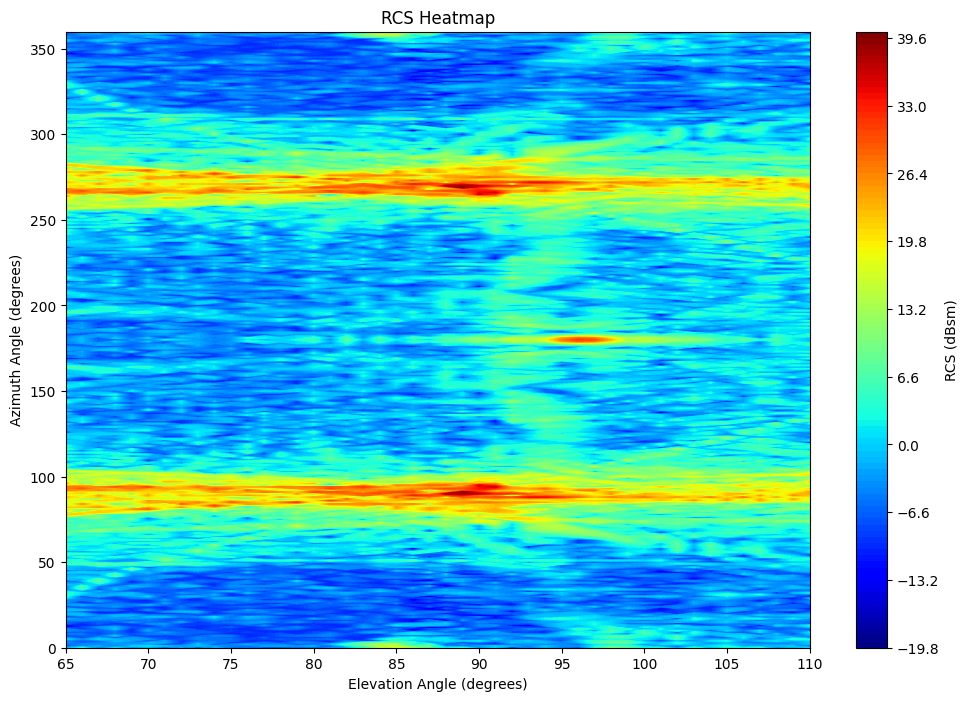

In [55]:
# 합쳐진 결과물 csv 파일을 시각화

# Load the CSV file
file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/Test.csv'
df = pd.read_csv(file_path)

# Reshape the data into a 2D grid for plotting
elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()

# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot(index='Azimuth Angle (degrees)', columns='Elevation Angle (degrees)', values='RCS (dBsm)')

# Create the plot
plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Azimuth Angle (degrees)')
plt.title('RCS Heatmap')
plt.show()

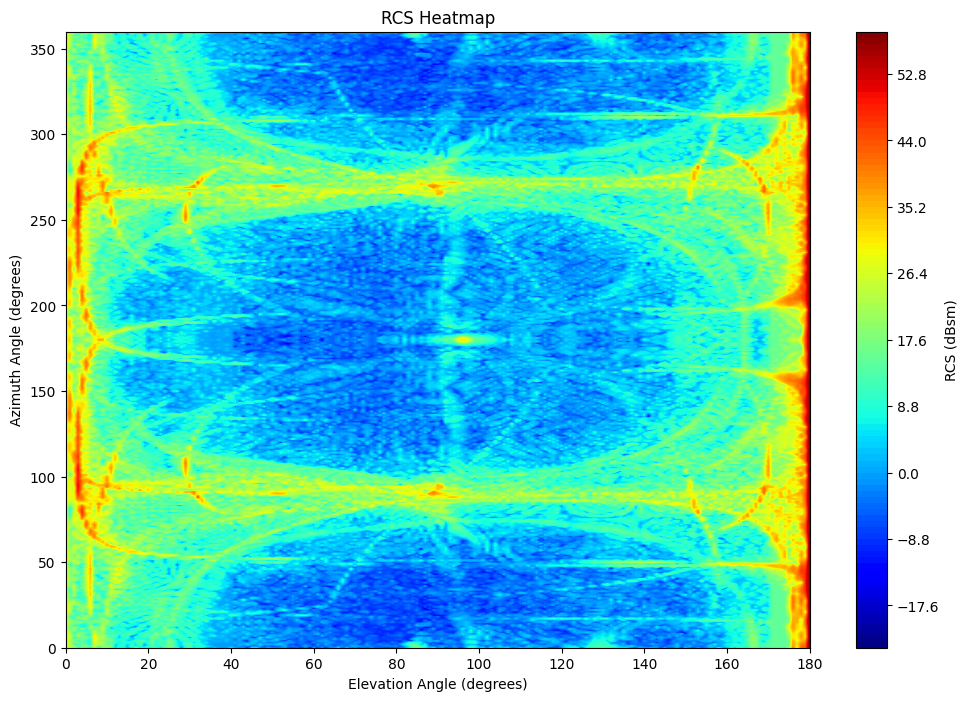

In [3]:
# 합쳐진 결과물 csv 파일을 시각화

# Load the CSV file
file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_PEC_1.csv'
df = pd.read_csv(file_path)

# Reshape the data into a 2D grid for plotting
elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()

# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot(index='Azimuth Angle (degrees)', columns='Elevation Angle (degrees)', values='RCS (dBsm)')

# Create the plot
plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Azimuth Angle (degrees)')
plt.title('RCS Heatmap')
plt.show()

In [54]:
# 데이터의 일부분만 뽑아내어 새 csv 파일로 생성
def extract_and_save_rows(input_file_path, output_file_path):
    # CSV 파일 불러오기
    data = pd.read_csv(input_file_path)
    
    # 23467번째 행부터 40007번째 행까지 데이터 추출
    # Python은 0-indexed 이므로 23466에서 40071까지를 선택
    extracted_data = data.iloc[23465:40071]
    
    # 추출된 데이터를 새로운 CSV 파일로 저장
    extracted_data.to_csv(output_file_path, index=False)

# 예시 사용법
input_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_PEC_1.csv'
output_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/Test.csv'
extract_and_save_rows(input_file_path, output_file_path)

In [8]:
# 행이 고각으로, 열이 방위각으로 구성된 csv 데이터파일을 생성
input_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed/Shahed136_PO_3D_PEC_1.csv'
new_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Shahed/NEW_Shahed_PO_3D_PEC_1.csv'
data = pd.read_csv(input_file_path)

# 데이터를 pivot하여 새로운 형태로 재구성
pivoted_data = data.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

# 재구성된 데이터를 CSV 파일로 저장
pivoted_data.to_csv(new_file_path, header=False, index=False)

pivoted_data.head()

Azimuth Angle (degrees),0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0
Elevation Angle (degrees),,,,,,,,,,,,,,,,,,,,,
0.0,15.459873,15.459082,15.458486,15.458084,15.457877,15.457866,15.458049,15.458429,15.459003,15.459771,...,15.459771,15.459003,15.458429,15.458049,15.457866,15.457877,15.458084,15.458486,15.459082,15.459873
1.0,8.237471,8.242136,8.179588,8.134930,8.003847,7.830051,7.550643,7.329381,7.167425,6.999106,...,6.999106,7.167425,7.329381,7.550643,7.830051,8.003847,8.134930,8.179588,8.242136,8.237471
2.0,5.021629,4.878715,4.366757,4.003037,3.415557,2.578359,1.711028,0.730057,-0.047837,-0.705554,...,-0.705554,-0.047837,0.730057,1.711028,2.578359,3.415557,4.003037,4.366757,4.878715,5.021629
3.0,18.001959,17.845308,17.228497,16.030013,14.155404,11.357265,7.515545,4.806156,6.691521,9.081417,...,9.081417,6.691521,4.806156,7.515545,11.357265,14.155404,16.030013,17.228497,17.845308,18.001959
4.0,15.830358,15.049890,12.550001,7.343189,-8.005792,1.009241,5.340138,5.434021,3.598836,4.076860,...,4.076860,3.598836,5.434021,5.340138,1.009241,-8.005792,7.343189,12.550001,15.049890,15.830358
